In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
excel_data = pd.read_excel('data.xlsx', sheet_name=None)

data = {
    sheet_name: {col: tuple(sheet[col]) for col in sheet.columns}
    for sheet_name, sheet in excel_data.items()
}

data_elec = pd.read_excel('data_elec.xlsx', sheet_name=None)

data_elec = {
    sheet_name: {col: tuple(sheet[col]) for col in sheet.columns}
    for sheet_name, sheet in data_elec.items()
}

# Equivalente Mecánico

## Termistor

/var/folders/vj/p_wfrn2s5dd6k2_7ngzxs6j40000gn/T/ipykernel_2644/1620167364.py:5: RuntimeWarning: invalid value encountered in log
  return 1 / ((1/t0) + (1/b) * (np.log(r) - np.log(r0))) - 273.15


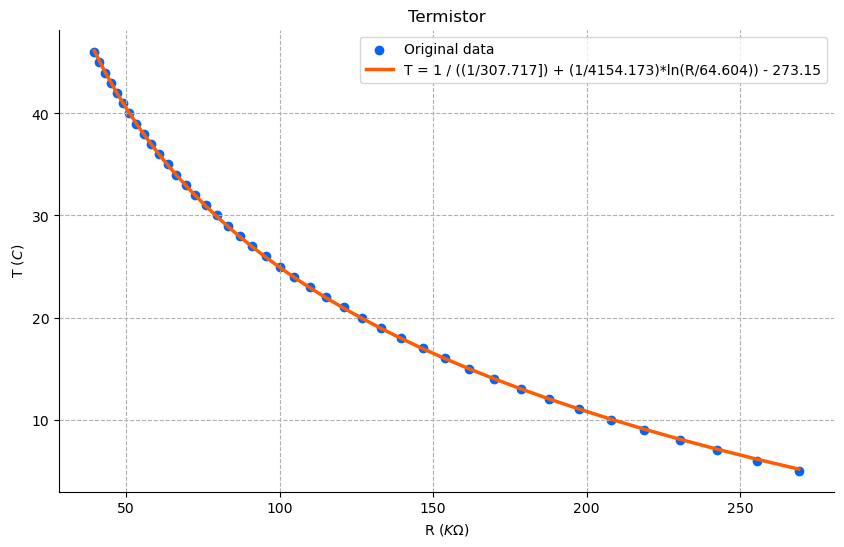

In [3]:
t = data['termistor']['C']
r = [i/1000 for i in data['termistor']['Ohm']]

def func(r, t0, b, r0):
    return 1 / ((1/t0) + (1/b) * (np.log(r) - np.log(r0))) - 273.15

popt, pcov = curve_fit(func, r, t)

plt.figure(figsize=(10,6))
plt.scatter(r, t, color='xkcd:bright blue',marker='o', zorder=1, label='Original data')
plt.plot(r, func(r, *popt), linewidth=2.5, color="xkcd:bright orange", zorder=2, label=rf"T = 1 / ((1/{popt[0]:.3f}]) + (1/{popt[1]:.3f})*ln(R/{popt[2]:.3f})) - 273.15")
plt.ylabel(rf"T $(C)$")
plt.xlabel(rf"R $(K\Omega)$")
plt.title("Termistor") 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='both', linestyle="--")
plt.legend()
plt.savefig('Termistor.png', dpi=300)
plt.show()

def termistor(r):
    return 1 / ((1/popt[0]) + (1/popt[1]) * (np.log(r) - np.log(popt[2]))) - 273.15

## Equivalente

In [ ]:
# Equivalente mecánico
n1 = data['mec']['n']
t1 = termistor(data['mec']['R'])
n2 = data['mec2']['n']
t2 = termistor(data['mec2']['R'])

(m_cal,m_pb,g,c,r) = (0.311,3.483,9.81,214,0.0565/2)

def Q(x,ti):
    return m_cal*c*(x-ti)
def W(x):
    return (m_pb*g)*(2*np.pi*r)*x

calor = [[Q(i,t1[0]) for i in t1], [Q(i,t2[0]) for i in t2]]
trabajo = [[W(i) for i in n1], [W(i) for i in n2]]

termo_reg = [linregress(i, j) for i, j in zip(calor, trabajo)]

plt.figure(figsize=(10,6))
plt.scatter(calor[0], trabajo[0], color='xkcd:bright blue',marker='.', zorder=0, label='Data 1')
plt.plot(calor[0], termo_reg[0][0]*np.array(calor[0]) + termo_reg[0][1], linewidth=2, color="xkcd:bright orange", zorder=0, label=rf"$y_1 = {termo_reg[0][0]:.2f}x + {termo_reg[0][1]:.2f}$")
plt.scatter(calor[1], trabajo[1], color='xkcd:bright purple',marker='.', zorder=0, label='Data 2')
plt.plot(calor[1], termo_reg[1][0]*np.array(calor[1]) + termo_reg[1][1], linewidth=2, color="xkcd:green", zorder=1, label=rf"$y_2 = {termo_reg[1][0]:.2f}x + {termo_reg[1][1]:.2f}$")
plt.xlabel(rf"Q $(cal)$")
plt.ylabel(rf"W $(J)$")
plt.title("Equivalente mecánico") 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='both', linestyle="--")
plt.legend()
plt.savefig('Mec.png', dpi=300)
plt.show()

# Equivalente Eléctrico